<img id="top" style="float:left;height:100px;" src="http://ich.cnam.fr/medias/photo/omnes-ubique-docet_1472542836182-gif?ID_FICHE=580363">
<a style="float:right;" href="http://www.cnam.fr//"><img style="height:100px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center></center>

<center>
    <h3 style="text-align:center;color:#888888;"> 
        <i>--  AER 213 - Fondamentaux de conception spatiale --</i></h3>
<h1>TN n°10</h1>
<h3>Utilisation du Module SOLSTICE en Projets</h3>
<h4> Changement de système gravitationnel </h4>
<h6><a href="mailto:simon.marie@lecnam.net">simon.marie@lecnam.net</a></h6>
</center>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Pour utiliser la génération de vidéo sur Jhub Cnam:
import os
#os.environ['PATH']=os.environ['PATH']+':/srv/conda/envs/notebook/bin/'
#Option pour afficher les figures dans le notebook et eviter le plt.show():
%matplotlib inline
fs=16
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)

In [2]:
# Constante célestes:                        
G=6.67408e-11 # Constante de gravitation 

**Pour être sûre d'avoir la dernière version:**

In [3]:
#! rm *.pyc
#! wget https://hpp.education/Lessons/AER213/Files/SOLSTICE.pyc

In [4]:
# Importation de la classe capsule
from SOLSTICE import Capsule,Stage,Launcher

Le module SOLSTICE permet l'intégration de la trajectoire d'un module motorisé dans un champ gravitationnel composé d'un corp principal (*body*) et d'un corp secondaire (*moon*). Par défaut, c'est le système Terre-Lune qui est choisi

On présente rapidement dans ce TN comment changer de système gravitationnel:

# 1 - Changement du système gravitationnel



In [5]:
dt=1

corp='Mars'
aster=Capsule(body=corp)

zs=0.5*aster.Rt
us=np.sqrt(G*aster.Mt/(aster.Rt+zs))

aster=Capsule(gi=0,z0=zs,u=us,body=corp,beta=1.8e-2) # cnap est le nom de notre capsule
aster.theta=np.pi/2
print(aster)

🗓️ 19, Mar 2025 | 22:11
⏳ time= 0j 0h 0min 0s 

📡 Position (/Mars/) 🪐
   u=2899.814508870314
   z=1698100.0
   theta=90.0
   Assiette=0.0 deg 
   Incidence=0.0deg 

☄️  Aerodynamique ☄️ 
   beta=0.018
   finesse=0.0



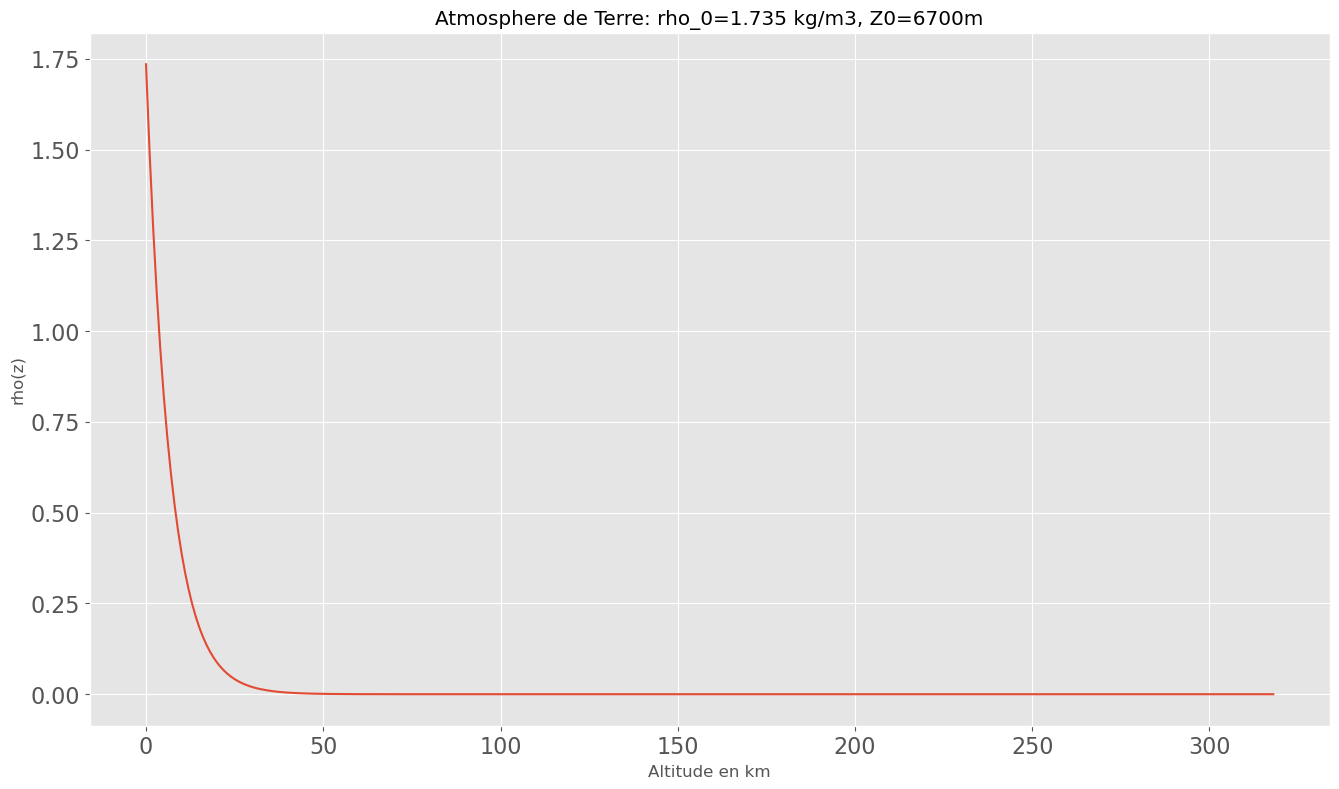

In [6]:
corp='Terre'
sonde=Capsule(body=corp)
sonde.atmosphere()

In [7]:
print(aster.moon,aster.Rl,aster.al,aster.thetaL*180/np.pi)

Phobos 11135 9377100 90.0


Si on veut regarder l'évolution de la capsule pendant une periode entière de révolution, on intégre la trajectoire sur une periode avec la méthode *run()*. 
**Calculer cette periode et effectuer une orbite complète**

In [8]:
# Periode de l'orbite à zs:
T1=np.sqrt((aster.Rt+zs)**3*4*np.pi**2/(G*aster.Mt))
aster.run(dt=dt,ntmax=T1/dt)

🗓️ 20, Mar 2025 | 01:15
⏳ time= 0j 3h 3min 59s 

📡 Position (/Mars/) 🪐
   u=2899.8144439351286
   z=1698099.9997053267
   theta=450.02947754954977
   Assiette=0.0 deg 
   Incidence=0.0deg 

☄️  Aerodynamique ☄️ 
   beta=0.018
   finesse=0.0



0-time | 1-r | 2-theta | 3-U | 4-Gamma | 5-Pdyn | 6-phi | 7-Acc | 8-Fl | 9-Alpha | 10-ref | 11-thetaL | 12-Ft | 13-Engine | 14-r2 | 15-theta2 | 16-Moon 


(0.0, 5773.54)

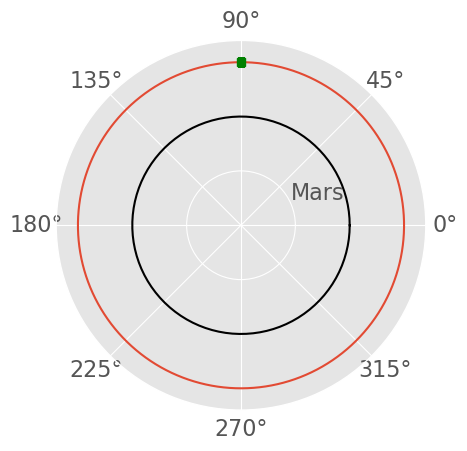

In [9]:
aster.plotraj('polar')
plt.ylim(0,1.7*aster.Rt/1000)

# 2 - Mise en orbite autour d'un corps secondaire

Pour se mettre directement en orbite autour de la lune (le corps secondaire), on doit injecter une capsule à la vitesse $V_1=V_L+V_2$ avec $V_L$ vitesse de la lune par rapport à la terre (corps principal):

$$
V_L=\sqrt{\dfrac{GM_t}{a_L}}
$$

et $V_2$ la vitesse de la sonde par rapport à la lune:

$$
V_2=\sqrt{\dfrac{GM_L}{r_2}}
$$

Attention la lune se trouve initialement à la position $\theta=\pi/2$


In [23]:
# Corps principal:
b1='Terre'
b2='Lune'

cap=Capsule(body=b1)
cap.setmoon(b2)

# Altitude/corp secondaire
z2=3000e3

# Altitude / corp principal
z1=cap.al-cap.Rt+cap.Rl+z2

# Vitesse du corp secondaire / corp principal
Vl=np.sqrt(G*cap.Mt/cap.al)

# Vitesse / corp secondaire
V2=np.sqrt(G*cap.Ml/(cap.Rl+z2))

# Vitesse / corp principal:
V1=Vl+V2

cap=Capsule(z0=z1,u=V1,body=b1) # cap est le nom de notre capsule
cap.setmoon(b2)
cap.theta=np.pi/2
print(Vl,V2,V1)
print(cap)

1018.8195346412764 1017.5729771624988 2036.392511803775
🗓️ 19, Mar 2025 | 22:15
⏳ time= 0j 0h 0min 0s 

📡 Position (/Terre/) 🪐
   u=2036.392511803775
   z=382356000.0
   theta=90.0
   Assiette=0.0 deg 
   Incidence=0.0deg 

☄️  Aerodynamique ☄️ 
   beta=0.005
   finesse=0.0



In [24]:
# On reste 1 jour en orbite autour du CS
cap.run(dt=1,ntmax=24*60*60)

🗓️ 20, Mar 2025 | 22:15
⏳ time= 1j 0h 0min 1s 

📡 Position (/Lune/) 🪐
   u=1014.4672881154655
   z=3000235.372723464
   theta=73.83886166405985
   Assiette=0.312492804477775 deg 
   Incidence=0.0deg 

☄️  Aerodynamique ☄️ 
   beta=0.005
   finesse=0.0



In [25]:
# Recherche d'une position particulière / CS (ici theta2=195)
theta_cible=205-360
while abs(cap.theta2-theta_cible*np.pi/180)>1e-4:
    cap.display=False
    cap.run(dt=1,ntmax=1)
    cap.display=True

0-time | 1-r | 2-theta | 3-U | 4-Gamma | 5-Pdyn | 6-phi | 7-Acc | 8-Fl | 9-Alpha | 10-ref | 11-thetaL | 12-Ft | 13-Engine | 14-r2 | 15-theta2 | 16-Moon 


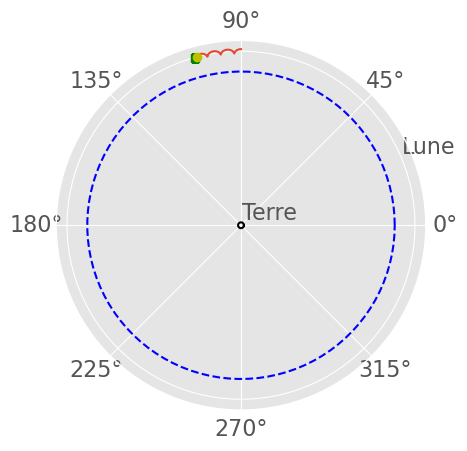

In [26]:
# Trajectoire / CP
cap.plotraj('polar')

0-time | 1-r | 2-theta | 3-U | 4-Gamma | 5-Pdyn | 6-phi | 7-Acc | 8-Fl | 9-Alpha | 10-ref | 11-thetaL | 12-Ft | 13-Engine | 14-r2 | 15-theta2 | 16-Moon 


(0.0, 13000.0)

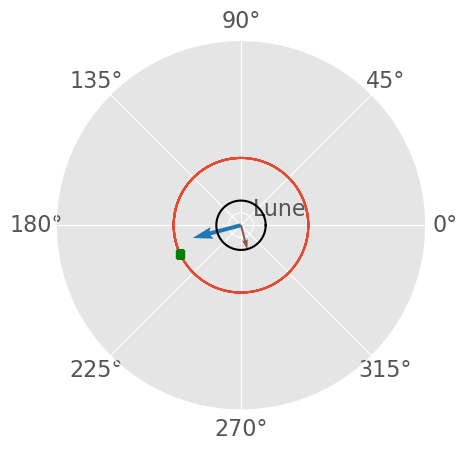

In [27]:
# Trajectoire / CS
cap.plotraj('polar',ref=1)
plt.ylim(0,13000)

In [28]:
#Manoeuvre / CS
#cap.mvr(200,0,ref=1)
cap.mvr(600,0,ref=1)

🗓️ 21, Mar 2025 | 01:12
⏳ time= 1j 2h 57min 35s 

📡 Position (/Lune/) 🪐
   u=1593.2121960291997
   z=2999266.5414381865
   theta=-155.00062162425013
   Assiette=0.2194609747502023 deg 
   Incidence=0.0deg 

☄️  Aerodynamique ☄️ 
   beta=0.005
   finesse=0.0



In [29]:
# Detection du perigée:
rp=cap.r
while cap.r<=rp:
    cap.display=False
    rp=cap.r
    cap.run(dt=dt,ntmax=1)
    cap.display=True

In [30]:
#Manoeuvre / CP
Vcirc=np.sqrt(G*cap.Mt/(cap.r))
cap.mvr(cap.u-Vcirc,180,ref=0)

🗓️ 24, Mar 2025 | 15:33
⏳ time= 4j 17h 17min 51s 

📡 Position (/Terre/) 🪐
   u=3605.04167711623
   z=24289392.356465444
   theta=272.79694490236847
   Assiette=-0.00452589661932448 deg 
   Incidence=0.0deg 

☄️  Aerodynamique ☄️ 
   beta=0.005
   finesse=0.0



In [31]:
dt=1
cap.run(dt=dt,ntmax=10*60*60/dt)

🗓️ 25, Mar 2025 | 01:33
⏳ time= 5j 3h 17min 52s 

📡 Position (/Terre/) 🪐
   u=3605.964620241518
   z=24275587.393370684
   theta=515.3104415935848
   Assiette=0.003864063132532817 deg 
   Incidence=0.0deg 

☄️  Aerodynamique ☄️ 
   beta=0.005
   finesse=0.0



0-time | 1-r | 2-theta | 3-U | 4-Gamma | 5-Pdyn | 6-phi | 7-Acc | 8-Fl | 9-Alpha | 10-ref | 11-thetaL | 12-Ft | 13-Engine | 14-r2 | 15-theta2 | 16-Moon 


(0.0, 85000.0)

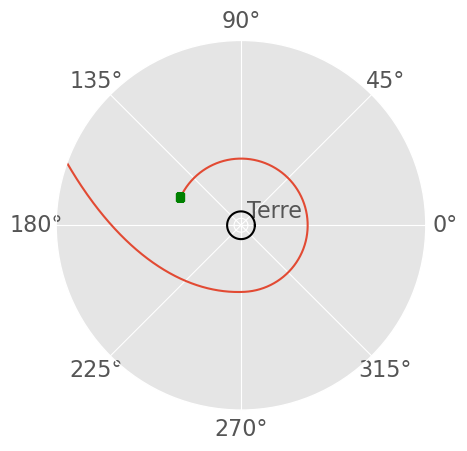

In [32]:
cap.plotraj('polar')
plt.ylim(0,85000)

In [33]:
#Manoeuvre Désorbitation
# On vise la surface du corps principal:
r1=cap.Rt
r2=cap.r
aT=(r1+r2)/2
dv=cap.u*(np.sqrt(2-r2/aT)-1)
print(dv)
cap.mvr(abs(dv),180,ref=0)

-1489.3724754819796
🗓️ 25, Mar 2025 | 01:33
⏳ time= 5j 3h 17min 52s 

📡 Position (/Terre/) 🪐
   u=2116.5921447595383
   z=24275587.393370684
   theta=515.3104415935848
   Assiette=0.0038640631325377543 deg 
   Incidence=0.0deg 

☄️  Aerodynamique ☄️ 
   beta=0.005
   finesse=0.0



In [34]:
dt=1
cap.run(dt=dt,ntmax=10*60*60/dt)

🗓️ 25, Mar 2025 | 05:05
⏳ time= 5j 6h 49min 54s 

📡 Position (/Terre/) 🪐
   u=47.99078279293171
   z=-10.608676344156265
   theta=685.7761678924786
   Assiette=90.00004371564556 deg 
   Incidence=0.0deg 

☄️  Aerodynamique ☄️ 
   beta=0.005
   finesse=0.0



0-time | 1-r | 2-theta | 3-U | 4-Gamma | 5-Pdyn | 6-phi | 7-Acc | 8-Fl | 9-Alpha | 10-ref | 11-thetaL | 12-Ft | 13-Engine | 14-r2 | 15-theta2 | 16-Moon 


(0.0, 45000.0)

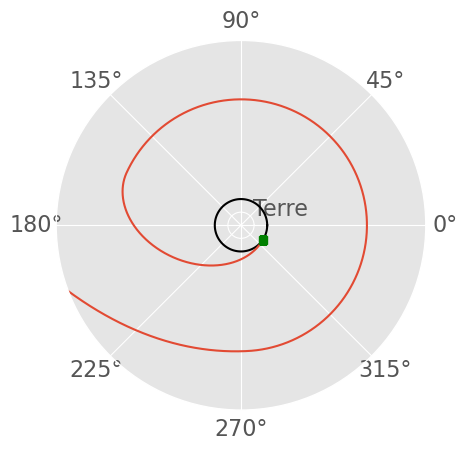

In [35]:
cap.plotraj('polar')
plt.ylim(0,45000)

In [36]:
cap.anim('polar',skip=100)

0-time | 1-r | 2-theta | 3-U | 4-Gamma | 5-Pdyn | 6-phi | 7-Acc | 8-Fl | 9-Alpha | 10-ref | 11-thetaL | 12-Ft | 13-Engine | 14-r2 | 15-theta2 | 16-Moon 
4565.94 images
zmax = 36604.441325556436 km


<Figure size 1440x1440 with 0 Axes>

In [37]:
from IPython.display import Video
Video('Rentree_'+b1+'.mp4', width=512, height=512)

# 3 - Rentrée Martienne et comparaison avec Perseverance

Les données de trajectoire de l'approche de Persévérance indiquent à 2000 km d'altitude:
$U=4500~ m/s$, $\gamma_i=80°$. On prendra ici pour la capsule: $\beta=1.8~ 10^{-2}$ (similaire à celle de Mars Insight).

On peut donc partir de ce point pour entammer la rentrée Martienne:

In [80]:
dt=0.01
corp='Mars'
aster=Capsule(body=corp)
zs=2000e3
us=4500

aster=Capsule(gi=80,z0=zs,u=us,body=corp,beta=1.8e-2,fin=0.5) 

In [81]:
aster.run(dt=dt,ntmax=T1/dt)

🗓️ 20, Mar 2025 | 15:31
⏳ time= 0j 0h 8min 28s 

📡 Position (/Mars/) 🪐
   u=118.62055492744516
   z=-0.306421316228807
   theta=5.8839280102700116
   Assiette=47.404608708726514 deg 
   Incidence=0.0deg 

☄️  Aerodynamique ☄️ 
   beta=0.018
   finesse=0.5



0-time | 1-r | 2-theta | 3-U | 4-Gamma | 5-Pdyn | 6-phi | 7-Acc | 8-Fl | 9-Alpha | 10-ref | 11-thetaL | 12-Ft | 13-Engine | 14-r2 | 15-theta2 | 16-Moon 


(0.0, 5433.92)

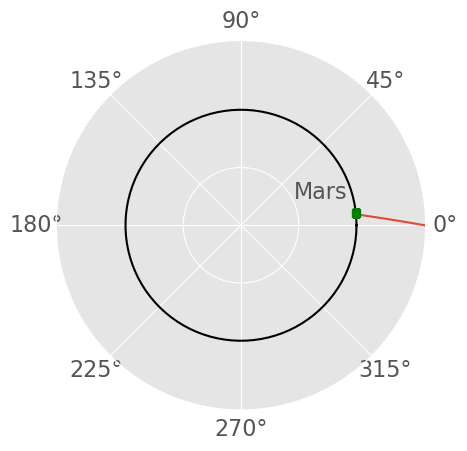

In [82]:
aster.plotraj('polar')
plt.ylim(0,1.6*aster.Rt/1000)

0-time | 1-r | 2-theta | 3-U | 4-Gamma | 5-Pdyn | 6-phi | 7-Acc | 8-Fl | 9-Alpha | 10-ref | 11-thetaL | 12-Ft | 13-Engine | 14-r2 | 15-theta2 | 16-Moon 


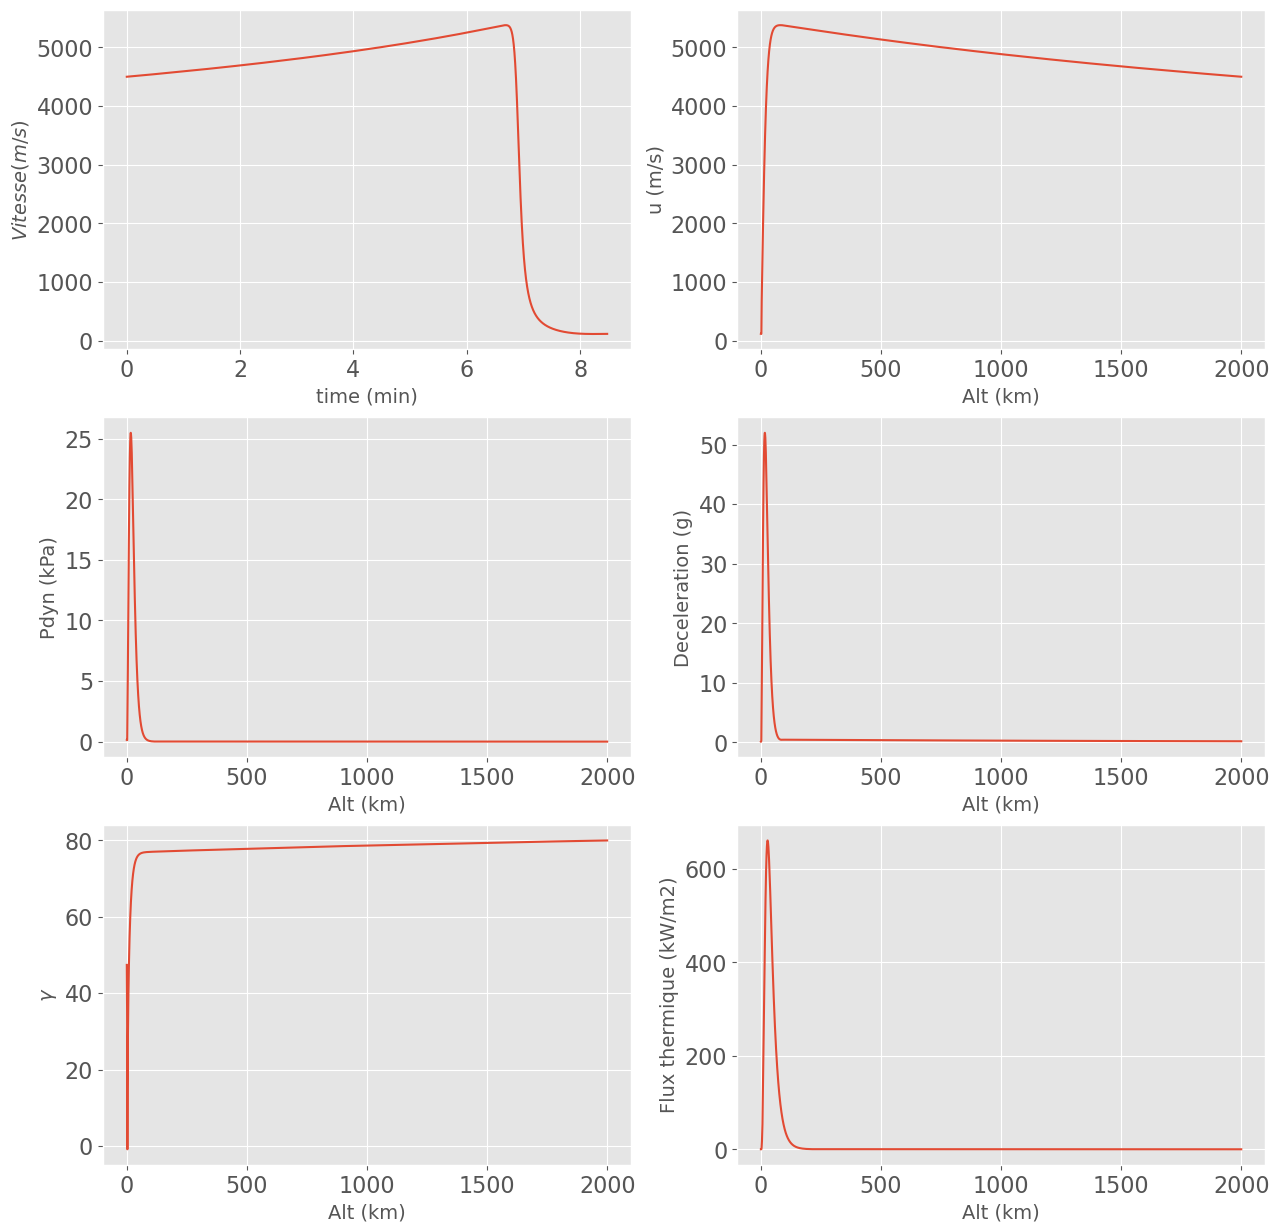

In [83]:
fig=plt.figure(figsize=(15,15))
aster.monit(fig)

In [84]:
Num=aster.load()

0-time | 1-r | 2-theta | 3-U | 4-Gamma | 5-Pdyn | 6-phi | 7-Acc | 8-Fl | 9-Alpha | 10-ref | 11-thetaL | 12-Ft | 13-Engine | 14-r2 | 15-theta2 | 16-Moon 


Les données de la rentrée de Perseverance sont dans le fichier *Perseverance_data.dat* contenant 4 colonnes:

Alt($km$)  - Mach  - Speed ($m/s$)  -  Accélération ($m/s^2$)

In [85]:
Persev=np.loadtxt('Perseverance_data.dat')

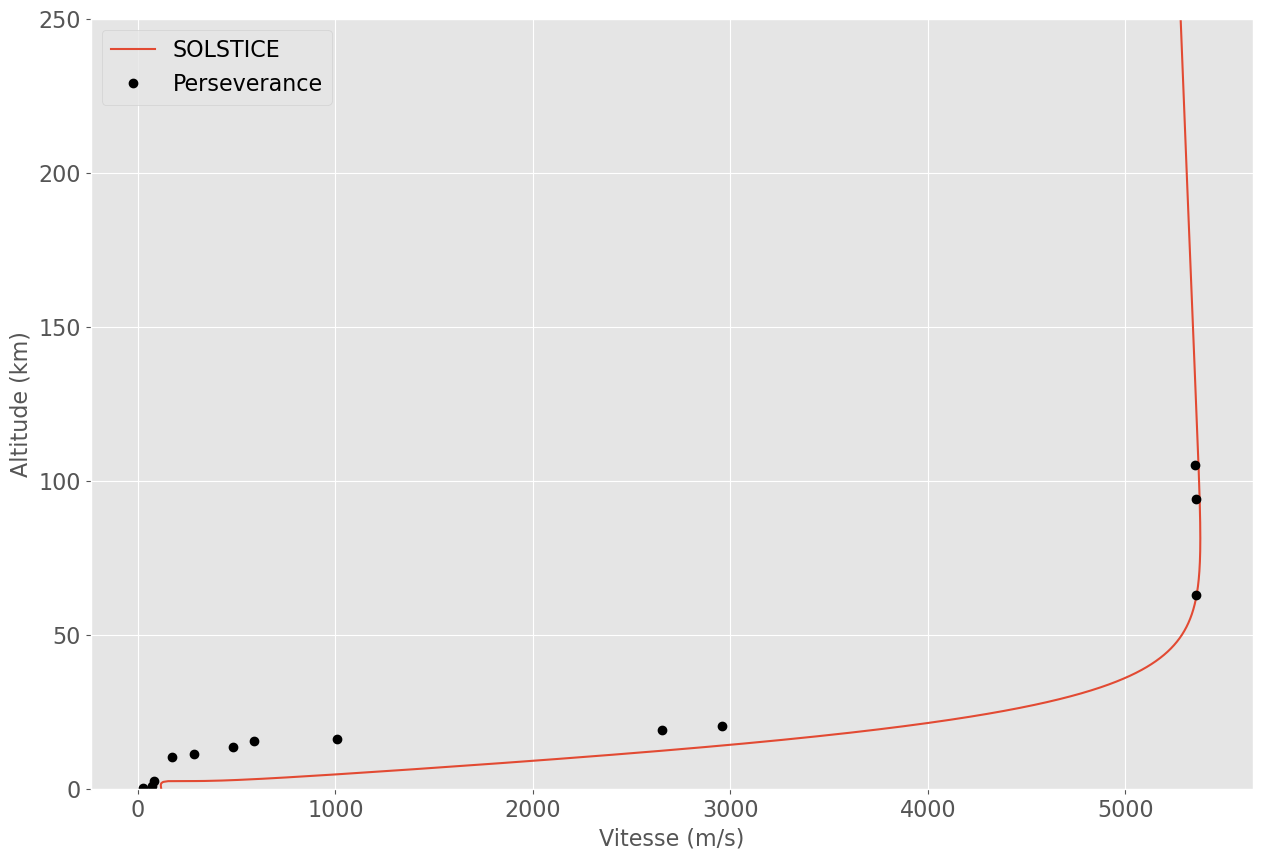

In [86]:
plt.figure(figsize=(15,10))
plt.plot(Num[:,3],(Num[:,1]-aster.Rt)/1000,label='SOLSTICE')
plt.plot(Persev[:,2],Persev[:,0],'ok',label='Perseverance')
plt.ylim(0,250)
plt.xlabel('Vitesse (m/s)',fontsize=fs)
plt.ylabel('Altitude (km)',fontsize=fs)
plt.legend(fontsize=fs)

In [87]:
from IPython.core.display import HTML
style=open('notebooks.css', "r").read()
HTML(style)

<img id="top" style="float:right;height:100px;" src="http://ich.cnam.fr/medias/photo/omnes-ubique-docet_1472542836182-gif?ID_FICHE=580363">
<a style="float:left;" href="http://www.cnam.fr//"><img style="height:100px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center><a href="#top">Retour en haut de la page</a></center>